# Лабораторна №3
## Гусак Владислав

Імпортуємо потрібні модулі і сворюємо модель

In [63]:
from numpy import *
from scipy import integrate
from matplotlib.gridspec import GridSpec
import pylab as p

In [64]:
theta=0.1/4
epsi=0.5+theta
beta=0.72-theta
alpha=0.0125
delta=0.009
xstat=beta/delta
ystat=epsi/alpha

In [65]:
x0=[xstat+0.05*xstat, xstat+0.1*xstat, xstat+0.5*xstat, xstat+xstat]
y0=ystat

In [66]:
a = epsi
b = alpha
c = beta
d = delta
def dX_dt(X, t=0):
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*X[0]*X[1] ])

Будуємо серію графіків залежності $x(t)$ і $y(t)$ і відповідні їм фазові портети систем

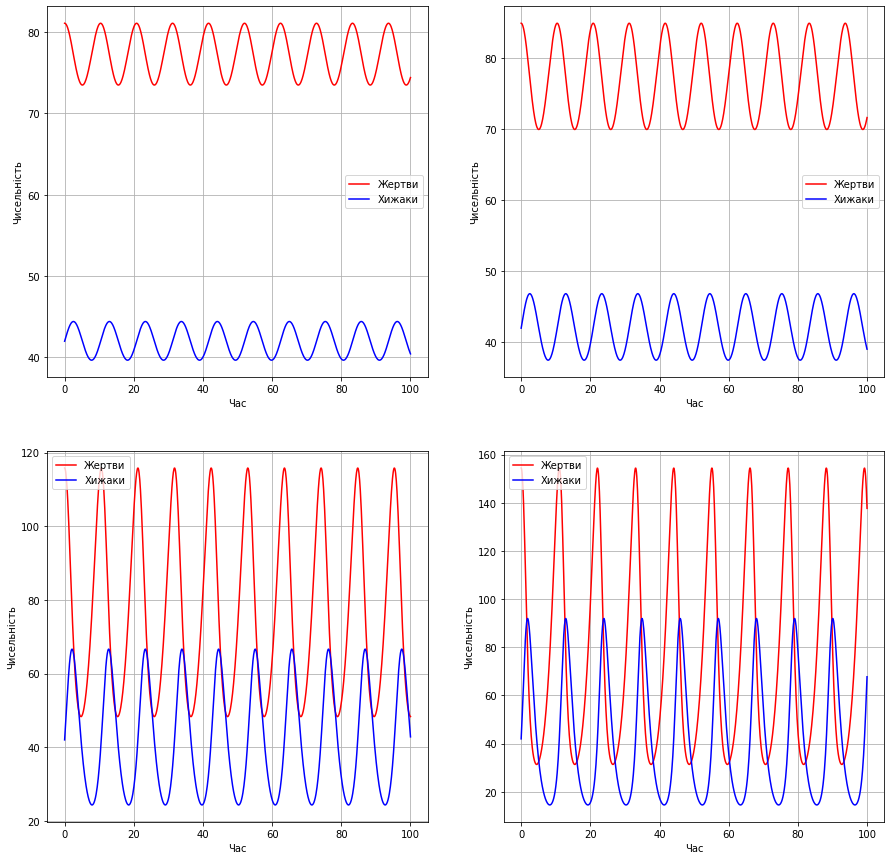

In [67]:
t = linspace(0, 100,  1000)  
fig=p.figure(figsize=(15, 15))
gs=GridSpec(2, 2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])
axes=[ax1, ax2, ax3, ax4]
for n in range(0, 4):
    X0 = array([x0[n], ystat])                     
    X= integrate.odeint(dX_dt, X0, t)
    rabbits, foxes = X.T
    axes[n].plot(t, rabbits, 'r-', label='Жертви')
    axes[n].plot(t, foxes  , 'b-', label='Хижаки')
    axes[n].grid()
    axes[n].set_ylabel('Чисельність')
    axes[n].set_xlabel('Час')
    axes[n].legend(loc='best')


(0.0, 95.86020978550877)

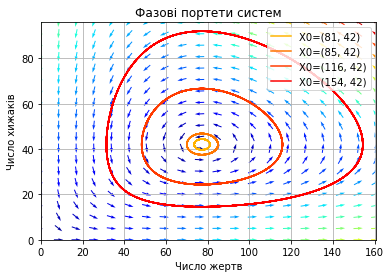

In [68]:
values  = linspace(0.3, 0.9, 4)                          
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  

f2 = p.figure()


for col, n in zip(vcolors, range(0, 4)): 
    X0[0]=x0[n]        
    X = integrate.odeint( dX_dt, X0, t)         
    p.plot( X[:,0], X[:,1], color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )


ymax = p.ylim(ymin=0)[1]                        
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       
DX1, DY1 = dX_dt([X1, Y1])                      
M = (hypot(DX1, DY1))                           
M[ M == 0] = 1.                                 
DX1 /= M                                       
DY1 /= M


p.title('Фазові портети систем')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Число жертв')
p.ylabel('Число хижаків')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

Можимо зробити оцніку періоду колиння чисельності хижаків та жертв, період приблизно 10 рокам рівний для всі чотиьох систем.

Також оціюємо при яких відхиленнях від $x_{ст}$  $y_{ст}$ гармонічні коливання зміняться на складні коливання, а форма фазової траєкторії стане відмінною від еліпсоїдальної.
Такі зміни відбуваються коли початкова кількість жертв переходить відмітку 110 (якщо почтакова кількість хижаків 42) і коли початкова кількість хижаків переходить відмітку 70 (якщо почтакова кількість жертв 81)

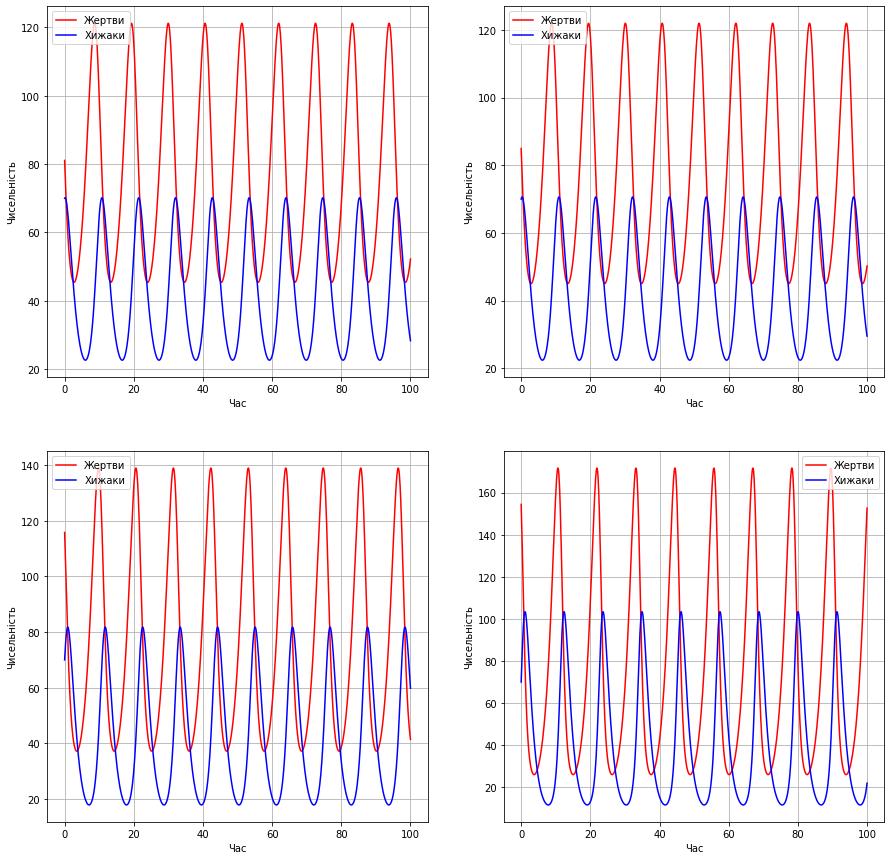

In [61]:
t = linspace(0, 100,  1000)  
fig=p.figure(figsize=(15, 15))
gs=GridSpec(2, 2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])
axes=[ax1, ax2, ax3, ax4]
for n in range(0, 4):
    X0 = array([x0[n], 70])                     
    X= integrate.odeint(dX_dt, X0, t)
    rabbits, foxes = X.T
    axes[n].plot(t, rabbits, 'r-', label='Жертви')
    axes[n].plot(t, foxes  , 'b-', label='Хижаки')
    axes[n].grid()
    axes[n].set_ylabel('Чисельність')
    axes[n].set_xlabel('Час')
    axes[n].legend(loc='best')


(0.0, 108.06974851354673)

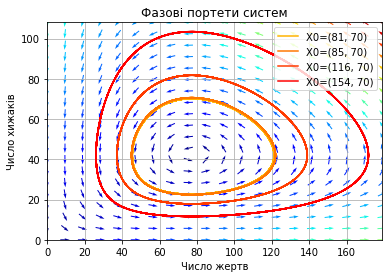

In [62]:
values  = linspace(0.3, 0.9, 4)                          
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  

f2 = p.figure()


for col, n in zip(vcolors, range(0, 4)): 
    X0[0]=x0[n]        
    X = integrate.odeint( dX_dt, X0, t)         
    p.plot( X[:,0], X[:,1], color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )


ymax = p.ylim(ymin=0)[1]                        
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       
DX1, DY1 = dX_dt([X1, Y1])                      
M = (hypot(DX1, DY1))                           
M[ M == 0] = 1.                                 
DX1 /= M                                       
DY1 /= M


p.title('Фазові портети систем')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Число жертв')
p.ylabel('Число хижаків')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

Проведемо дослідження при яких співвідношеннях параметрів модель «хижак - жертва» перетвореться у модель природнього росту

In [86]:
a = 0.75
b = 0.0125
c = 0
d = delta
def dX_dt(X, t=0):
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*X[0]*X[1] ])

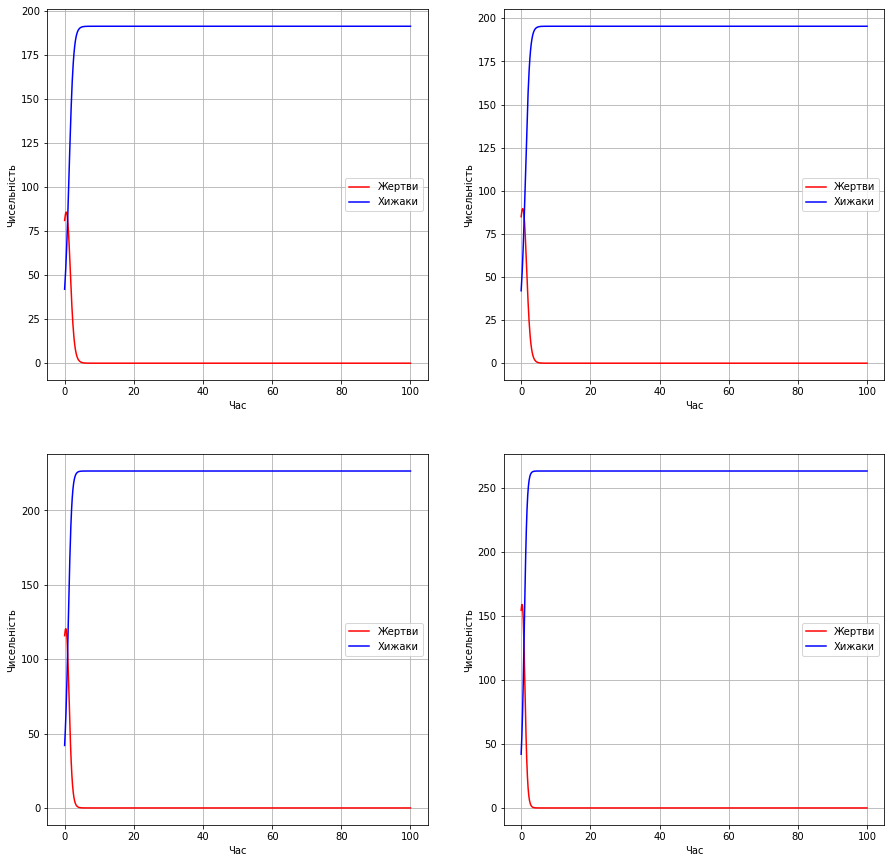

In [87]:
t = linspace(0, 100,  1000)  
fig=p.figure(figsize=(15, 15))
gs=GridSpec(2, 2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])
axes=[ax1, ax2, ax3, ax4]
for n in range(0, 4):
    X0 = array([x0[n], ystat])                     
    X= integrate.odeint(dX_dt, X0, t)
    rabbits, foxes = X.T
    axes[n].plot(t, rabbits, 'r-', label='Жертви')
    axes[n].plot(t, foxes  , 'b-', label='Хижаки')
    axes[n].grid()
    axes[n].set_ylabel('Чисельність')
    axes[n].set_xlabel('Час')
    axes[n].legend(loc='best')

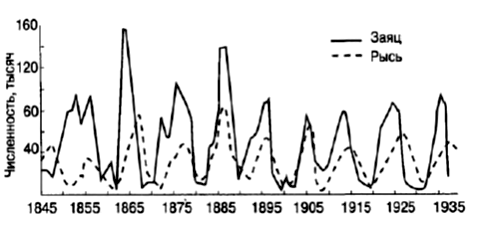
Модель яка аназіується в цій роботі загалом відповідає експерементальним данним, врахавуючи що наша модель не враховує, можливий дифіцит рослинної їжі для жерв, відсутня внутрішньовидова боротьба і хижаки харчуються лише жертвами.

## Висновок

Отже, в данній роботі було побудовано модель взаємодії хижак-жертва. Загалом модель показує результати схожі з екперементальними, проте вона лише врахову взаємодію двох видів як хижака і жертву, і не враховує інші можливі взаємодії між видами. Також не враховуються інші взаємодії в екосистемі, наприклад взаємодію видів які досліджуються і інших видів, чи різні сезонні флуктуації. Тому ця модель може мати лише обмежене використання в моделюванні екосистем.